In [45]:
!pip install transformers datasets --quiet
!pip install matplotlib seaborn --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline

In [46]:
# Contoh: Dataset Review
# Ganti URL lokal atau path sesuai dataset kamu
df = pd.read_csv('PRDECT-ID Dataset.csv')  # misal review produk

# Tampilkan 5 data awal
df.head()

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy


In [47]:
# Cek kolom dan missing value
df.info()
df.isnull().sum()

# Jika perlu, drop baris kosong
df.dropna(subset=['Customer Review'], inplace=True)
df.reset_index(drop=True, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         5400 non-null   object 
 1   Product Name     5400 non-null   object 
 2   Location         5400 non-null   object 
 3   Price            5400 non-null   int64  
 4   Overall Rating   5400 non-null   float64
 5   Number Sold      5400 non-null   int64  
 6   Total Review     5400 non-null   int64  
 7   Customer Rating  5400 non-null   int64  
 8   Customer Review  5400 non-null   object 
 9   Sentiment        5400 non-null   object 
 10  Emotion          5400 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 464.2+ KB


In [61]:
import re

def bersihkan_teks(teks):
    teks = str(teks).lower()                      # lowercase
    teks = teks.strip()                           # hapus spasi depan/belakang
    teks = re.sub(r'[^\w\s]', '', teks)           # hapus tanda baca
    teks = re.sub(r'\s+', ' ', teks)              # ubah spasi ganda jadi satu
    return teks

df['Cleaned Review'] = df['Customer Review'].apply(bersihkan_teks)

df_before = len(df)
df = df.drop_duplicates(subset='Cleaned Review')
df_after = len(df)

print(f"Jumlah data sebelum: {df_before}")
print(f"Jumlah data setelah: {df_after}")
print(f"Duplikat yang dihapus: {df_before - df_after}")


Jumlah data sebelum: 5288
Jumlah data setelah: 5271
Duplikat yang dihapus: 17


In [49]:
# Gunakan model pre-trained
sentiment_model = pipeline("sentiment-analysis")

# Ambil beberapa review untuk diklasifikasi ulang
sample_reviews = df['Customer Review'].head(10).tolist()

for review in sample_reviews:
    result = sentiment_model(review)[0]
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {result['label']}, Confidence: {result['score']:.2f}")
    print("-" * 40)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Review: alhamdulillah berfungsi dengan baik. packaging aman. respon cepat dan ramah. seller dan kurir amanah
Predicted Sentiment: NEGATIVE, Confidence: 0.98
----------------------------------------
Review: barang bagus dan respon cepat, harga bersaing dengan yg lain.
Predicted Sentiment: NEGATIVE, Confidence: 0.98
----------------------------------------
Review: barang bagus, berfungsi dengan baik, seler ramah, pengiriman cepat
Predicted Sentiment: NEGATIVE, Confidence: 0.96
----------------------------------------
Review: bagus sesuai harapan penjual nya juga ramah. trimakasih pelapak ??
Predicted Sentiment: NEGATIVE, Confidence: 0.99
----------------------------------------
Review: barang bagus, pengemasan aman, dapat berfungsi dengan baik
Predicted Sentiment: NEGATIVE, Confidence: 0.96
----------------------------------------
Review: barang bagus, seller ramah..
Predicted Sentiment: NEGATIVE, Confidence: 0.97
----------------------------------------
Review: mantap paten joss
Predict

In [50]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Ambil review panjang
text_to_summarize = df['Customer Review'][0]  # Ganti index jika perlu

summary = summarizer(text_to_summarize, max_length=45, min_length=10, do_sample=False)
print("Original Review:\n", text_to_summarize)
print("\nSummary:\n", summary[0]['summary_text'])


Device set to use cpu
Your max_length is set to 45, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


Original Review:
 alhamdulillah berfungsi dengan baik. packaging aman. respon cepat dan ramah. seller dan kurir amanah

Summary:
 Alhamdulillah berfungsi dengan baik packaging aman. respon cepat dan ramah. seller dan kurir amanah.


/tmp/ipython-input-51-241936216.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='coolwarm')


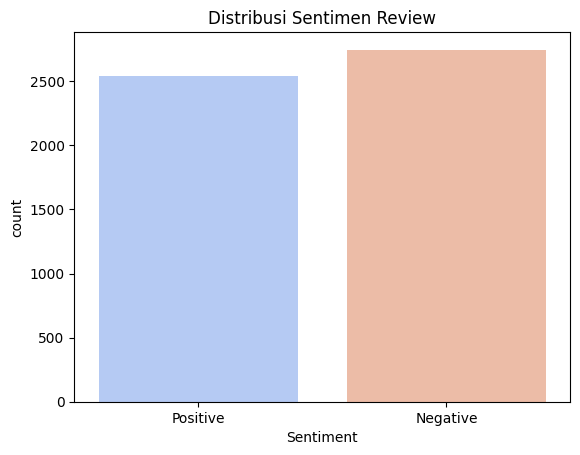

In [51]:
sns.countplot(data=df, x='Sentiment', palette='coolwarm')
plt.title('Distribusi Sentimen Review')
plt.show()

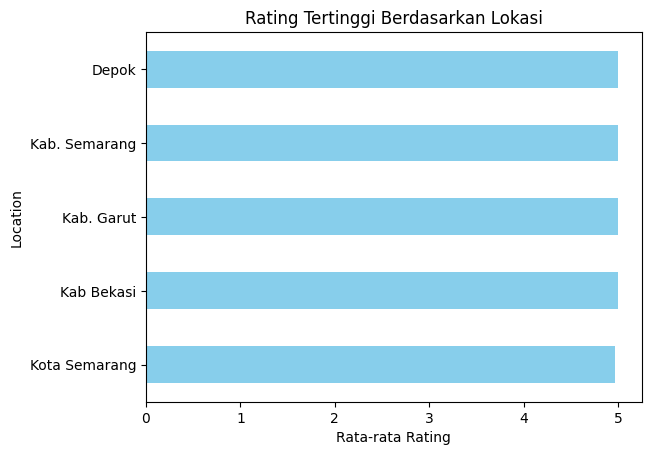

In [52]:
loc_rating = df.groupby('Location')['Overall Rating'].mean().sort_values(ascending=False).head(5)
loc_rating.plot(kind='barh', color='skyblue')
plt.xlabel('Rata-rata Rating')
plt.title('Rating Tertinggi Berdasarkan Lokasi')
plt.gca().invert_yaxis()
plt.show()


In [53]:
# Gabungkan berdasarkan nama produk
grouped = df.groupby('Product Name', as_index=False)['Number Sold'].sum()

# Ambil 5 produk terlaris
top_sold = grouped.sort_values(by='Number Sold', ascending=False).head(5)

/tmp/ipython-input-54-2745638875.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


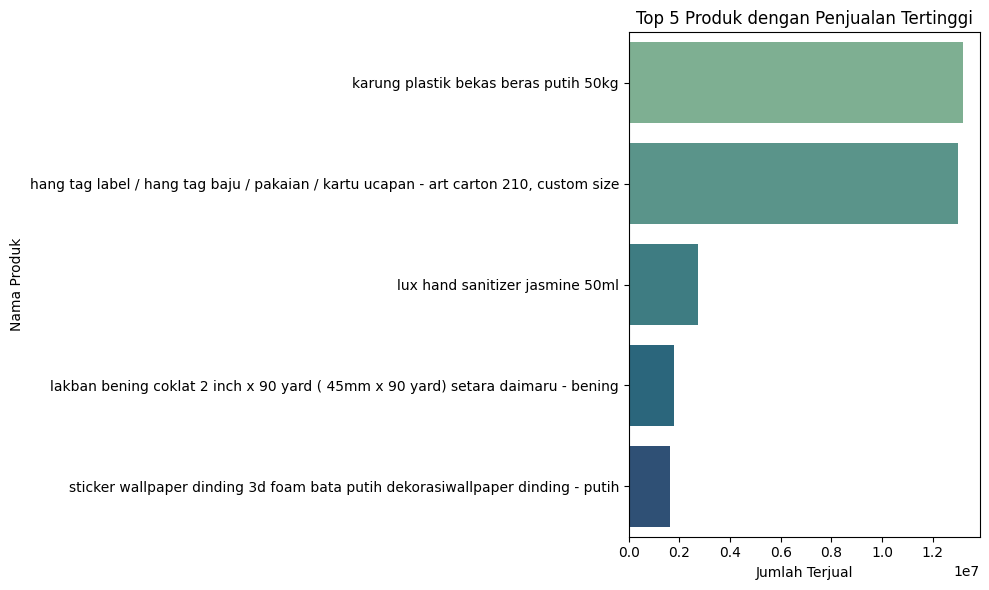

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Number Sold',
    y='Product Name',
    data=top_sold,
    palette='crest'
)
plt.title('Top 5 Produk dengan Penjualan Tertinggi')
plt.xlabel('Jumlah Terjual')
plt.ylabel('Nama Produk')
plt.tight_layout()
plt.show()



/tmp/ipython-input-55-826938377.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Emotion', palette='pastel')


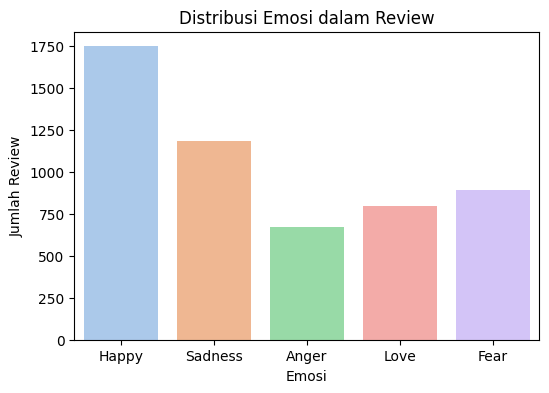

In [55]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Emotion', palette='pastel')
plt.title('Distribusi Emosi dalam Review')
plt.xlabel('Emosi')
plt.ylabel('Jumlah Review')
plt.show()

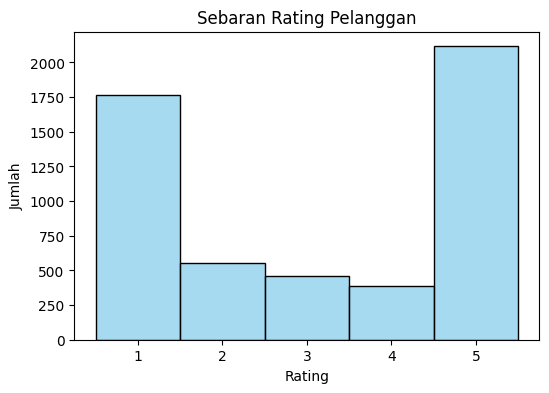

In [56]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Customer Rating', bins=5, kde=False, discrete=True, color='skyblue')
plt.title('Sebaran Rating Pelanggan')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()


/tmp/ipython-input-57-3092174484.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_locations, x='Number Sold', y='Location', palette='light:#5A9')


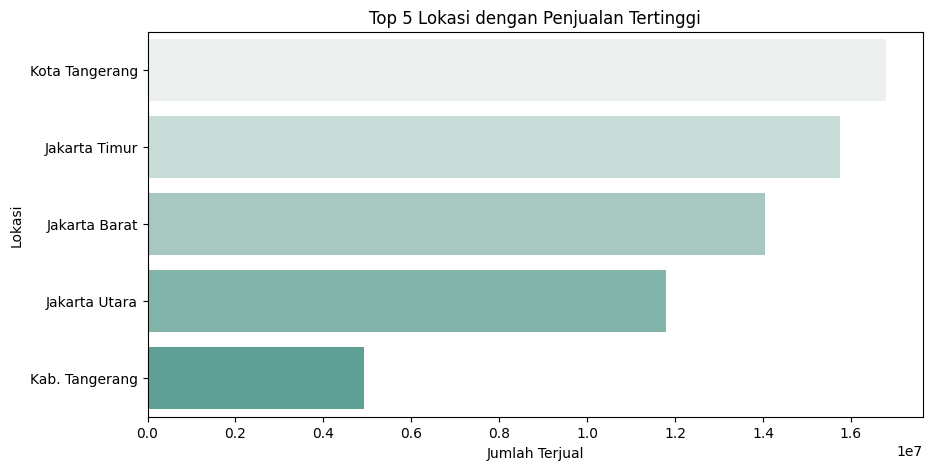

In [57]:
# Gabungkan total penjualan per lokasi
location_sales = df.groupby('Location', as_index=False)['Number Sold'].sum()
top_locations = location_sales.sort_values(by='Number Sold', ascending=False).head(5)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_locations, x='Number Sold', y='Location', palette='light:#5A9')
plt.title('Top 5 Lokasi dengan Penjualan Tertinggi')
plt.xlabel('Jumlah Terjual')
plt.ylabel('Lokasi')
plt.show()


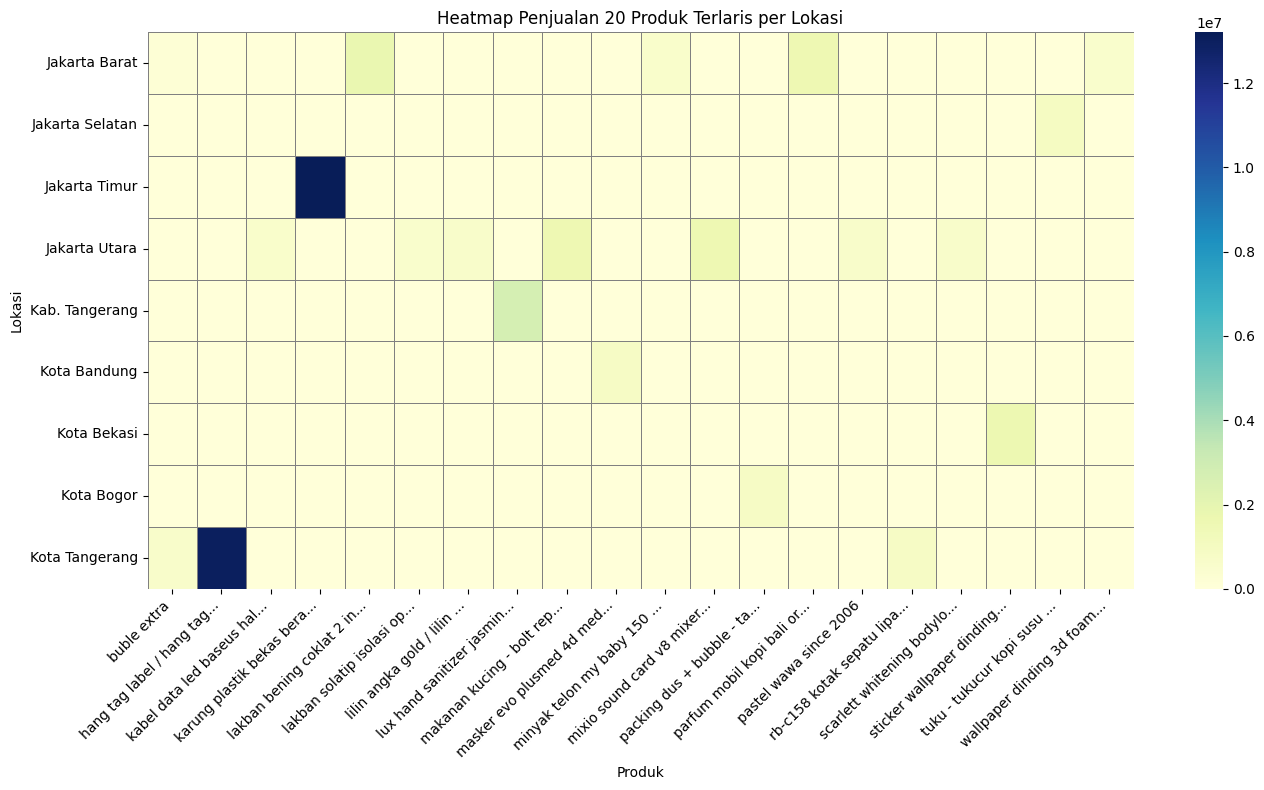

In [58]:
# Buat nama produk pendek maksimal 25 karakter
df['Product Short'] = df['Product Name'].apply(lambda x: x[:25] + '...' if len(x) > 25 else x)
# Contoh memperbaiki karakter rusak di lokasi
df['Location'] = df['Location'].str.replace('�', 'e')  # atau pakai replace manual jika tahu lokasi aslinya
# Ambil 20 produk dengan total penjualan tertinggi
top_products = df.groupby('Product Short')['Number Sold'].sum().sort_values(ascending=False).head(20).index

# Filter dataframe hanya ke produk tersebut
df_top = df[df['Product Short'].isin(top_products)]
# Buat pivot table
pivot = df_top.pivot_table(
    index='Location',
    columns='Product Short',
    values='Number Sold',
    aggfunc='sum',
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title('Heatmap Penjualan 20 Produk Terlaris per Lokasi')
plt.xlabel('Produk')
plt.ylabel('Lokasi')
plt.xticks(rotation=45, ha='right')  # putar label produk agar lebih terbaca
plt.tight_layout()
plt.show()


In [59]:
# Simpan file baru (jika sudah ditambahkan hasil analisis)
df.to_csv('hasil_analisis_produk.csv', index=False)